# **Sales Analysis**



In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [38]:
# Combining sales data from 12 months into one file


df = pd.read_csv(r"C:\Users\AsRock\Downloads\Portfolio\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\AsRock\Downloads\Portfolio\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\AsRock\Downloads\Portfolio\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [41]:
all_data = pd.read_csv("all_data.csv")
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [52]:
# Eliminate the NaN values from the dataset

all_data = all_data.dropna()
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [53]:
# Remove the duplicate column headers from the dataset

all_data = all_data[all_data["Order Date"].str[0:5] != "Order"]

In [56]:
# Transform the columns to their appropriate data type in the dataset

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [54]:
# Incorporate a column for months into the dataset

all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("Int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [57]:
# Add a sales column to the dataset

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [80]:
# Create new columns in the dataset to store the city and state information

all_data["City"] = all_data["Purchase Address"].str.split(',').str[1]
all_data["State"] = all_data["Purchase Address"].str.split(' ').str[-2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


## Which months had the highest and lowest sales figures?

In [64]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


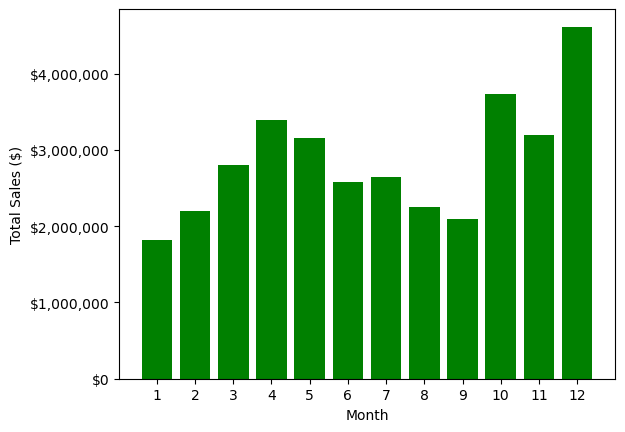

In [95]:
# Create a bar chart to visually represent the results

monthly_sales = all_data.groupby("Month").sum()

import matplotlib.ticker as ticker

months = range(1, 13)

plt.bar(months, monthly_sales["Sales"], color = "green")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'${int(y):,}'))

plt.show()


## Findings

• The best month for sales was December with a total sales of $4,613,443.34.

• The worst month for sales was January with a total sales of $1,822,256.73.

• We can also observe a trend in sales throughout the year, with the sales increasing from January to April, then declining from May to August, and increasing again from September to December. This could be due to various factors, such as seasonal changes or marketing campaigns.

## Which city had the highest sales figures?

In [84]:
all_data.groupby(["City", "State"]).sum()

Quantity Ordered  Price Each   Month       Sales
City           State                                                  
 Atlanta       GA                16602  2779908.20  104794  2795498.58
 Austin        TX                11153  1809873.61   69829  1819581.75
 Boston        MA                22528  3637409.77  141112  3661642.01
 Dallas        TX                16730  2752627.82  104620  2767975.40
 Los Angeles   CA                33289  5421435.23  208325  5452570.80
 New York City NY                27932  4635370.83  175741  4664317.43
 Portland      ME                 2750   447189.25   17144   449758.27
               OR                11303  1860558.22   70621  1870732.34
 San Francisco CA                50239  8211461.74  315520  8262203.91
 Seattle       WA                16553  2733296.01  104941  2747755.48

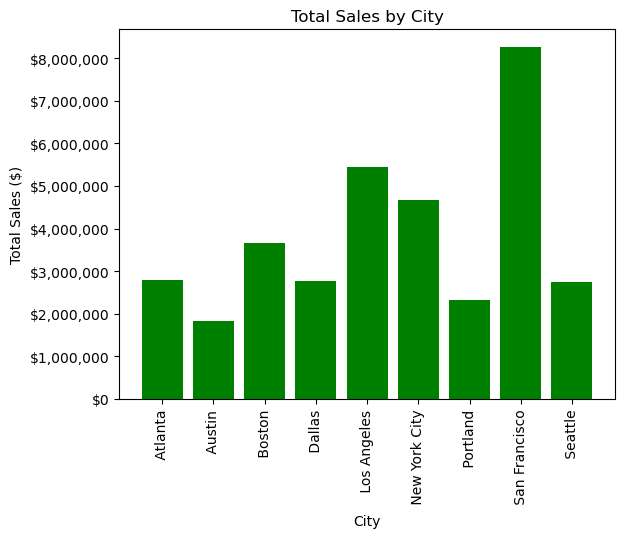

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

cities_sales = all_data.groupby("City").sum()

plt.bar(cities_sales.index, cities_sales["Sales"], color="green")
plt.xticks(rotation=90)

plt.xlabel("City")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by City")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'${int(y):,}'))

plt.show()

## Findings

• The cities with the highest total sales are San Francisco, Los Angeles, and New York City.

• The total sales seem to be positively correlated with the population of the city and the state. For example, San Francisco, Los Angeles, and New York City are among the most populous cities in the United States.

• The states with the highest total sales are all located on the coasts, which may indicate that proximity to ports and international trade is an important factor for generating high sales.

• The total sales in each city are likely influenced by local economic factors such as the presence of large companies or industries, as well as local consumer preferences and spending habits. For example, San Francisco has a thriving technology industry, which may contribute to its high total sales.

• The total sales in each city may also be affected by seasonal trends, as well as cultural or regional differences in consumer behavior. For example, cities with a large tourism industry may experience higher sales during peak travel seasons.

## What is the optimal time to display advertisements to increase the probability of customers purchasing the product?

In [103]:
# Convert the "Order Date" column from a string format to a pandas datetime format.

all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

all_data["Order Hour"] = all_data["Order Date"].dt.hour
all_data["Order Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


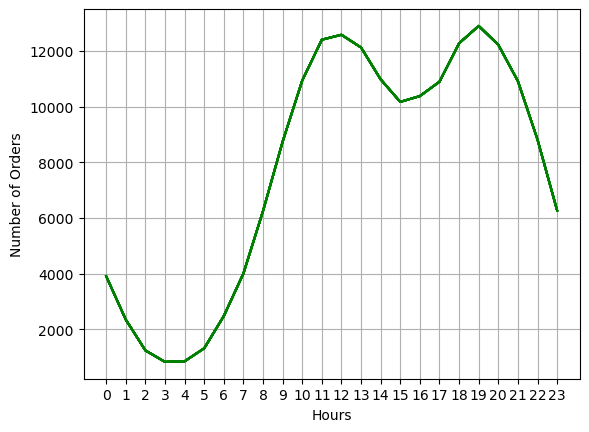

In [108]:
hours = [hour for hour, df in all_data.groupby("Order Hour")]

plt.plot(hours, all_data.groupby(["Order Hour"]).count(), color = "green")
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()

## Findings

• The peak sales times occur at 12 p.m. and 7 p.m.

• To increase the likelihood of customers seeing advertisements, they should be displayed shortly before the peak sales times (i.e., at 11:45 a.m. and 6:45 p.m.).

• It may be beneficial to run experiments to determine if displaying advertisements during non-peak hours results in higher sales or greater customer engagement.

## Determine which products had the highest sales volume

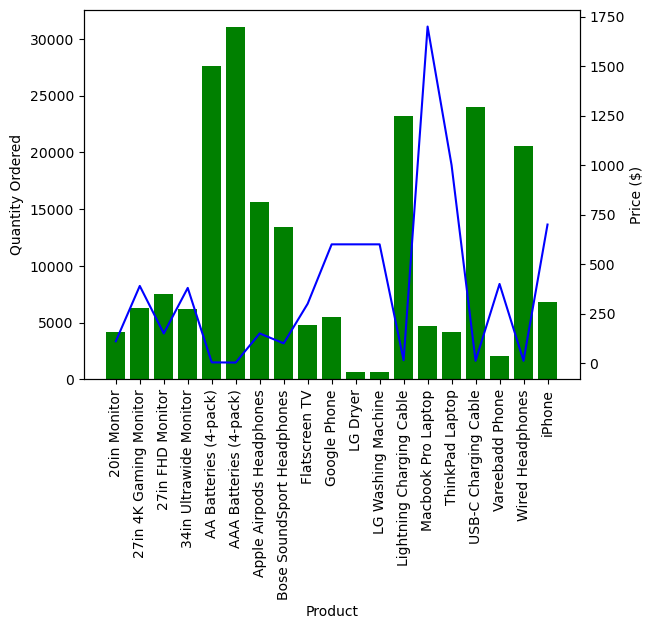

In [125]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
prices = all_data.groupby("Product").mean()["Price Each"]
products = [product for product, df in product_group]

fig, ax1 = plt.subplots()

ax1.bar(products, quantity_ordered, color="green")
ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered")

ax2 = ax1.twinx()
ax2.plot(products, prices, color='blue')
ax2.set_ylabel("Price ($)")

# Set the tick locations and labels
ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation=90)

plt.show()

## Findings

• The products with the highest sales volume were AA and AAA batteries.

• The price of AA Batteries (4-pack) and AAA batteries (4-pack) was the lowest compared to other products.

• The products with the smallest quantity ordered were LG Dryer and LG Washing Machine.

•The products with the highest price were MacBook Pro laptop and ThinkPad Laptop.

• There may be a possible relation between the sales of MacBook Pro Laptop and ThinkPad Laptop and the cities with the highest total sales, but further analysis is needed to determine if there is a correlation.